# **EM GMM Algorithm**

In [145]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[8,8]   # set the size of figure to be this value in the entire colab default is 6 x 6
plt.rcParams['font.size']=10

In [146]:
#1
rng=np.random.default_rng(seed=1001)
k=rng.choice([0,1,2],size=1,p=[0.3,0.5,0.2])[0]
k

np.int64(1)

In [147]:
rng=np.random.default_rng(seed=1001)
mu=np.array([-4,0,5])
sigma=np.sqrt(np.array([2,1,3]))
rng.normal(mu[k],sigma[k])   # norm in scipy

0.9323224351204542

In [148]:
#2
rng=np.random.default_rng(seed=1001)
mu=np.array([-4,0,5])
sigma=np.sqrt(np.array([2,1,3]))
pi=np.array([0.3,0.5,0.2])
n=100_000
X=np.zeros(n)
for i in range(n):
  k=rng.choice([0,1,2],size=1,p=pi)[0]
  X[i]=rng.normal(mu[k],sigma[k])
X.mean()

np.float64(-0.1930762698848285)

(array([2.000e+00, 1.000e+00, 1.300e+01, 3.000e+00, 1.800e+01, 1.800e+01,
        3.300e+01, 6.800e+01, 8.300e+01, 1.170e+02, 1.640e+02, 2.360e+02,
        3.160e+02, 4.140e+02, 5.230e+02, 6.050e+02, 8.190e+02, 9.110e+02,
        1.163e+03, 1.308e+03, 1.438e+03, 1.549e+03, 1.674e+03, 1.715e+03,
        1.817e+03, 1.822e+03, 1.811e+03, 1.713e+03, 1.641e+03, 1.424e+03,
        1.340e+03, 1.275e+03, 1.156e+03, 1.236e+03, 1.276e+03, 1.437e+03,
        1.691e+03, 2.091e+03, 2.498e+03, 3.050e+03, 3.436e+03, 3.891e+03,
        4.126e+03, 4.400e+03, 4.287e+03, 3.969e+03, 3.650e+03, 3.178e+03,
        2.547e+03, 2.006e+03, 1.606e+03, 1.236e+03, 9.460e+02, 7.000e+02,
        5.750e+02, 5.140e+02, 5.130e+02, 5.100e+02, 6.220e+02, 6.200e+02,
        7.100e+02, 7.900e+02, 8.300e+02, 8.780e+02, 8.960e+02, 9.530e+02,
        9.880e+02, 9.520e+02, 9.570e+02, 1.026e+03, 9.220e+02, 8.280e+02,
        7.730e+02, 7.190e+02, 6.360e+02, 6.040e+02, 5.200e+02, 4.210e+02,
        3.600e+02, 2.990e+02, 2.480e+0

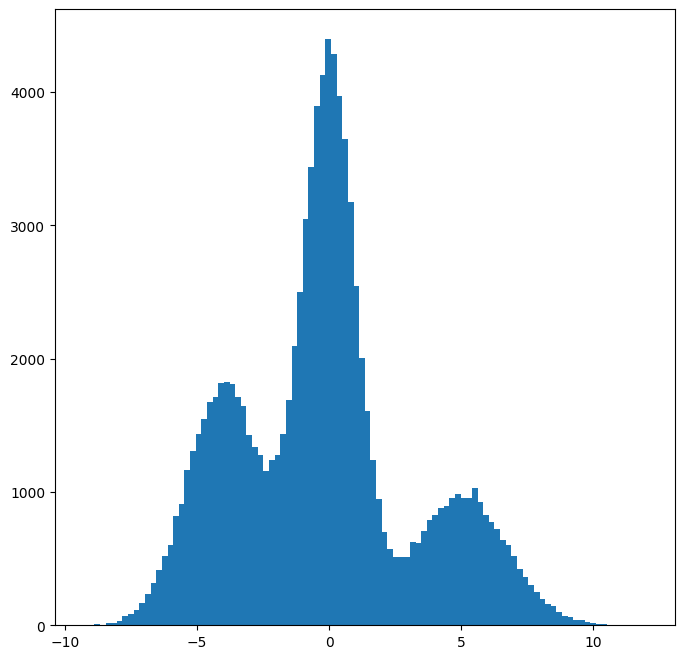

In [149]:
#3
plt.hist(X,bins=100) # default 10

In [150]:
#4 EM algo
def init():
  return  np.array([1,2,3,1,1,1,1/3,1/3,1/3])
theta_0=init()
np.linalg.norm(theta_0)

np.float64(4.163331998932265)

In [151]:
def Gaussian(x,mu,sigma):
  den=np.sqrt(2*np.pi)*sigma**2
  num=np.exp(-(x-mu)**2/(2*sigma**2))
  return num/den

In [152]:
def estep(theta,X):
  n=X.shape[0]
  K=theta.shape[0]//3
  mu=theta[:K]
  sigma=np.sqrt(theta[K:2*K])
  pi=theta[2*K:]
  lamb=np.zeros((n,K))
  for i in range(n):
    x=X[i]
    evidence=sum([pi[k]*Gaussian(x,mu[k],sigma[k]) for k in range(K)])
    for k in range(K):
      prior=pi[k]
      likelihood=Gaussian(x,mu[k],sigma[k])
      lamb[i,k]=prior*likelihood/evidence

  return lamb
lamb1=estep(theta_0,X)
lamb1[:,0].sum()

np.float64(68226.19649822346)

In [153]:
def mstep(lamb,X):
  n=X.shape[0]
  K=lamb.shape[1]
  var=np.zeros(K)
  mu=np.zeros(K)
  pi=np.zeros(K)
  for k in range(K):
    mu[k]=((X*lamb[:,k]).sum())/sum(lamb[:,k])
    var[k]=((((X-mu[k])**2)*lamb[:,k]).sum())/sum(lamb[:,k])
    pi[k]=sum(lamb[:,k])/n
  return np.concatenate([mu,var,pi])
theta_1=mstep(lamb1,X)
np.linalg.norm(theta_1)

np.float64(8.691800143713909)

In [154]:
#5
def distance(theta_old,theta_new):
  return np.linalg.norm(theta_old-theta_new)
distance(theta_0,theta_1)

np.float64(6.266759156221257)

In [158]:
#6
epsilon,iter=0.01,0
theta,theta_prev=theta_1,theta_0
while distance(theta_prev,theta)>=epsilon:
  lamb=estep(theta,X)
  theta_prev,theta=theta,mstep(lamb,X)
  iter+=1
iter

16

In [156]:
#7
theta_original=np.array([-4,0,5,2,1,3,0.3,0.5,0.2])
distance(theta_original,theta)

np.float64(0.8260773219082859)

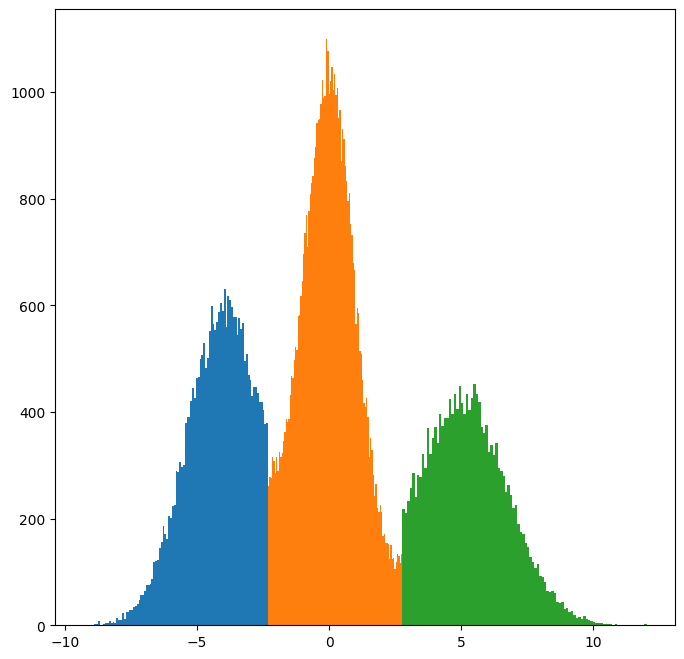

In [157]:
#8
index=lamb.argmax(axis=1)
plt.hist(X[index==0],bins=100)
plt.hist(X[index==1],bins=100)
plt.hist(X[index==2],bins=100);